# k-Nearest Neighbor Klassifikator

Folgendes Diagram zeigt 2D Merkmalvektoren der Klassen "Zahlen" und "Buchstaben" in Form von Zahlen (1-5) und Buchstaben (a-f)


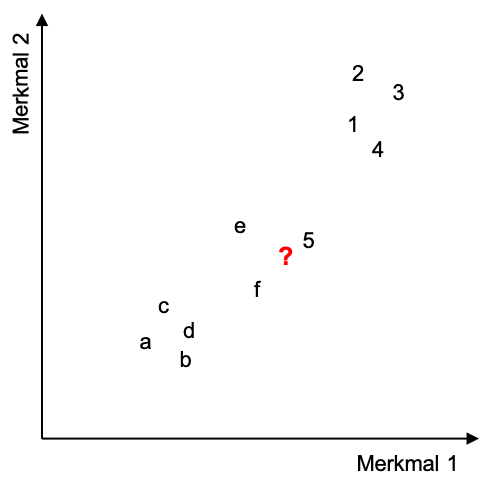

Als Distanzmaß wird der Euklidabstand verwendet.

a) Welche Klasse wird <font color='red'>?</font> bei einem 1-NN Klassifikator zugeweisen?
Zahl(?) Aber eigentlich ist er sich doch selbst der nächste Nachbar...

b) Welche Klasse wird <font color='red'>?</font> bei einem 3-NN Klassifikator zugeweisen?
Buchstabe

c) Geben Sie an, wie sich im Falle des 3-NN Klassifikators eine Rückweisung implementieren lässt? Welchen Wert hätte <font color='red'>?</font> in diesem Fall? 
Vorschlag 1: Bei uneinstimmigkeit (nicht 3 NN derselben Klasse) wird zurückgewiesen. Problem: Randfälle werden fast immer zurückgewiesen. ? Hätte keinen Wert, weil zurückgewiesen.
Vorschlag 2: Betrachtung mehrerer weiterer NN (ohne sie in die eigentliche Bewertung miteinfließen zu lassen). Sind zu viele (was auch immer das dann heißt) einer anderen Klasse angehörig als die ursprüngliche Entscheidung aussagen würde, wird zurückgewiesen. Problem: Mehraufwand und weiterer Wert wird benötigt. ? Hätte Klasse Buchstabe.

d) Beim kNN Klassifikator müssen die gesamten Trainingsdaten im Speicher gehalten werden. Zur Klassifikation müssen Distanzen für alle Trainingsbeispiele berechnet werden. <br>
  > d1) Wie könnte dieses "Effizienzproblem" gelöst werden? <br>
  Entfernen von inneren Clusterknoten (Wenn viele Knoten derselben Klasse nahe beieinander liegen (Cluster bilden) werfen wir alle bis auf die Randfälle des Clusters weg, da diese keinen weiteren Einfluss (vermutlich) haben werden)
  > d2) Welche Nachteile hat die Methode aus d1? <br>
  Datenverlust

# Implementieren des kNN Klassifikators in Python




Implementieren Sie eine Klasse MyKNN, die einen kNN Klassifikator definieren soll. Als Abstandsmaß ist Euklid-Abstand zu implementieren. 

Verwenden Sie die Struktur wie in sklearn:
- Klassifikatoren werden als Klasse repraesentiert
- Es gibt eine fit()- und eine predict()-Methode

(150,)


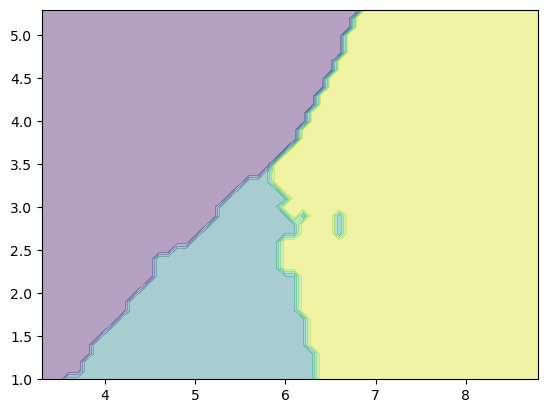

In [13]:
import numpy as np
import math
import sklearn
import matplotlib.pyplot as plt
import statistics
from sklearn.datasets import load_iris
import pandas as pd


class MyKNN:
    
    def __init__(self, n_Neighbors):
        self.D = {}
        self.k = n_Neighbors
        
    def fit(self, X, y):
        i=0
        for line in X:
            self.D[tuple(line)] = y[i]
            i +=1
    def predict(self, X):
        labelList = []
        for x in X:
            U = {}
            labelsOfNeighbors = []
            for key in self.D:
                U[math.dist(key, x)] = self.D.get(key)
            for i in range(self.k):
                labelsOfNeighbors.append(U.pop(min([*U])))
            labelList.append(statistics.mode(labelsOfNeighbors))
        return np.array(labelList)
            
        
iris_dataset = load_iris()
X=iris_dataset['data'][:,[0,1]]
y=iris_dataset['target']
print(y.shape)

x1_min,x1_max = X[:,0].min() -1, X[:,0].max()+1    # fuer beide Merkmale werden min- und max-Werte bestimmt.  
x2_min,x2_max = X[:, 1].min() -1 , X[:,1].max()+1  

xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,0.1), np.arange(x2_min,x2_max,0.1)) 

example_vecs=np.c_[xx1.ravel(), xx2.ravel()]

test = MyKNN(3)
test.fit(X,y)
Z = test.predict(example_vecs)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1,xx2,Z,alpha=0.4)  
plt.show()

## Verwenden Sie den Visualisierungscode aus dem Vorlesungs-Notebook um Ihre implementierung zu testen.

## Testen Sie das Verfahren auf Datensätzen Ihrer Wahl, z.B. 
- Iris-data
- Digit-data
- Wine-data
von sklearn

Zunächst Training = Test

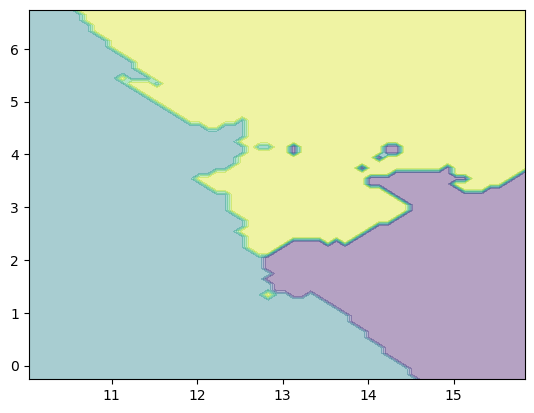

In [25]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()
wine_dataframe = pd.DataFrame(wine_dataset['data'], columns=wine_dataset.feature_names)
#grr = pd.plotting.scatter_matrix(wine_dataframe, c=wine_dataset['target'], figsize=(15,15), marker='o' )

X=wine_dataset['data'][:,[0,1]]
y=wine_dataset['target']

x1_min,x1_max = X[:,0].min() -1, X[:,0].max()+1    # fuer beide Merkmale werden min- und max-Werte bestimmt.  
x2_min,x2_max = X[:, 1].min() -1 , X[:,1].max()+1  

xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,0.1), np.arange(x2_min,x2_max,0.1)) 

example_vecs=np.c_[xx1.ravel(), xx2.ravel()]

test = MyKNN(8)
test.fit(X,y)
Z = test.predict(example_vecs)
Z = Z.reshape(xx1.shape)

plt.contourf(xx1,xx2,Z,alpha=0.4)  
plt.show()

## Bestimmen Sie die Güte Ihres Klassifikators und Testen Sie unterschiedliche Werte für k.

## Zerlegen Sie die Daten in ein Training- und Testset und testen Sie erneut.

## Verwenden Sie ein Validierungsset zur Bestimmung eines geeigneten Parameters k

## Verwenden Sie eine Kreuzvalidierung zur Bestimmung von k

